<a href="https://colab.research.google.com/github/SmridhVarma/ML-Practice/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Smridh Varma
RA2111003011530
Q. Explore the Dataset and apply the principle of forecasting : Amazon.csv
```



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Amazon.csv")
df

,rt
0,0.026055
1,-0.004516
2,-0.021539
3,-0.032507
4,0.026516
...,...
3362,0.014385
3363,-0.003522
3364,0.008420
3365,-0.022305


In [8]:
df.describe()

,rt
count,3367.000000
mean,0.000866
std,0.025268
min,-0.246182
25%,-0.010640
50%,0.000283
75%,0.012775
max,0.238621


from matplotlib import pyplot as plt
_df_0['rt'].plot(kind='hist', bins=20, title='rt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rt'].plot(kind='line', figsize=(8, 4), title='rt')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
df.isnull().sum()

rt    0
dtype: int64

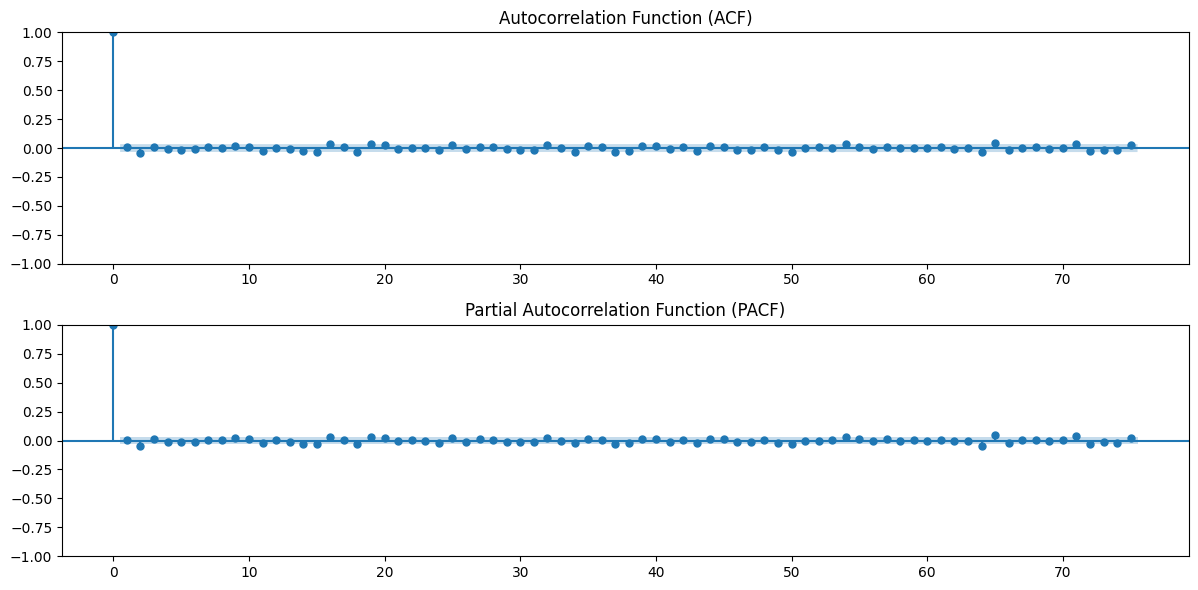

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data = df['rt']

# Plot autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(data, lags=75, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot partial autocorrelation function (PACF)
plt.subplot(2, 1, 2)
plot_pacf(data, lags=75, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

- From the above we can conclude that there are no null values.

-  After looking at the summary statistics we find that the values range from -0.246.. to 0.2386..

- There are no other columns or relations to explore.

- In other cases we wouldve decided our approach based on the nature of the data.

- The ACF and PACF graphs represent those of white noise and dont indicate any relations relvent for models such as AR, MA, or ARMA.
[Plot interpretation reference](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf)

- For simple forecasting we wouldve fit the data to an LR or similar model and for time series data we wouldve first divided the data into uniform time periods and then into time series models like ARIMA, SARIMA, fb prophet etc but due to the lack of context --> we will go ahead and train both models.

In [17]:
#Implementing Linear Regression

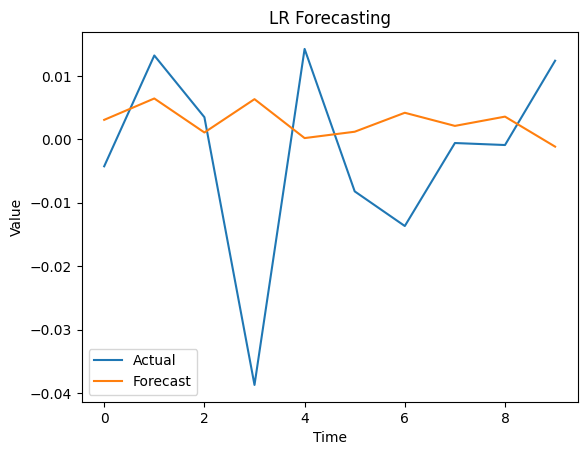


=============================================EVALUATION METRICS=================================================
Mean Absolute Error (MAE): 0.012349530260416446
Mean Squared Error (MSE): 0.0002945727630341542
Root Mean Squared Error (RMSE): 0.017163122181996907
R-squared (R2): -0.3036556485422941
=============================================X features dataframe=================================================
       lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
10 -0.008222  0.006787  0.016078  0.036347  0.026020  0.026516 -0.032507   
11  0.015846 -0.008222  0.006787  0.016078  0.036347  0.026020  0.026516   
12 -0.007269  0.015846 -0.008222  0.006787  0.016078  0.036347  0.026020   
13  0.017287 -0.007269  0.015846 -0.008222  0.006787  0.016078  0.036347   
14 -0.001225  0.017287 -0.007269  0.015846 -0.008222  0.006787  0.016078   

       lag_8     lag_9    lag_10  
10 -0.021539 -0.004516  0.026055  
11 -0.032507 -0.021539 -0.004516  
12  0.026516 -0.032507 -

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = df.copy()

forecast_horizon = 10 #predicting 10 'time units ahead' as ther eis no context - assuming each observation is made after continuous intervals of '1 time unit' each

# creating lag features for autoregression
for i in range(1, forecast_horizon + 1):
    data[f'lag_{i}'] = data['rt'].shift(i)

# droppping rows with null values which are created when data is moved due to lag
data.dropna(inplace=True)

# Split data into features (X) --> created by lag here and target variable (y) --> original data frame created above but shifted into the future with lag
X = data.drop('rt', axis=1)
y = data['rt']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model init
model = LinearRegression()

# model fit
model.fit(X_train, y_train)

# forecasting the next 'forecast_horizon' time steps
forecast = model.predict(X_test[:forecast_horizon])

plt.plot(y_test[:forecast_horizon].values, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LR Forecasting')
plt.legend()
plt.show()

# model evaluation
mae = mean_absolute_error(y_test[:forecast_horizon], forecast)
mse = mean_squared_error(y_test[:forecast_horizon], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_test[:forecast_horizon], forecast)
print('')
print('=============================================EVALUATION METRICS=================================================')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print('=============================================X features dataframe=================================================')
print(f"{X.head()}")
print('=============================================target variables======================================================')
print(f"{y.head()}")

In [40]:
#implmenting ARIMA model

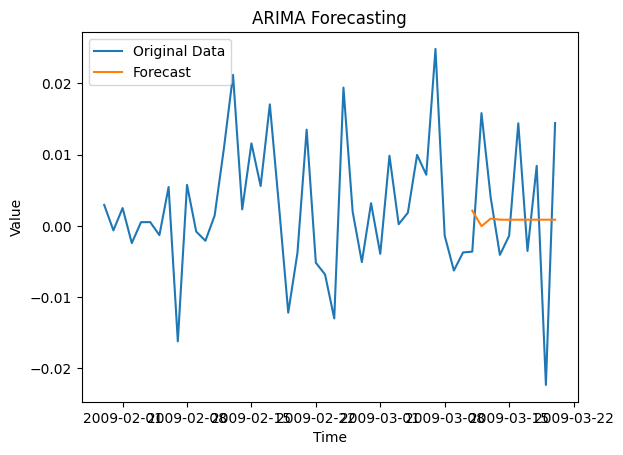


==================================================EVALUATION METRICS============================================
Mean Absolute Error (MAE): 0.009395814731244748
Mean Squared Error (MSE): 0.00013027141816468487
Root Mean Squared Error (RMSE): 0.011413650518772899

===============================================NEW DATA USED WITH TIME INDEX======================================


2000-01-01    0.026055
2000-01-02   -0.004516
2000-01-03   -0.021539
2000-01-04   -0.032507
2000-01-05    0.026516
Freq: D, Name: rt, dtype: float64

In [52]:
from statsmodels.tsa.arima.model import ARIMA

data = df['rt']

# Convert the index to a time-based index assuming '1 time unit' i.e 1 daya from 2001 as ARIMA models need 1 time variable and 1 target variable
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.date_range(start='2000-01-01', periods=len(data), freq='D')

# Defining ARIMA parameters
p = 2
d = 0
q = 1

# model fitting phase
model = ARIMA(data, order=(p, d, q))
arima_results = model.fit()

# Forecasting using ARIMA
forecast_horizon = 10
forecast = arima_results.forecast(steps=forecast_horizon)

plt.plot(data.index[-50:], data.values[-50:], label='Original Data')  # Plotting only the last 50 data points for better visualization and to see comparison between original and forecast on plo titself
plt.plot(data.index[-10:], forecast, label='Forecast')  # Plotting the forecasted values for the next 10 time steps
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

# Compute the actual values for the forecast horizon
actual_values = data.iloc[-forecast_horizon:]

# model evaluation
print("")
print("==================================================EVALUATION METRICS============================================")
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

print('')
print("===============================================NEW DATA USED WITH TIME INDEX======================================")
data.head()

- The metrics indicate that the ARIMA model is performing reasonably well.